#Connect to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import libraries

In [ ]:
seed=42
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow.keras.layers as tfkl

#Universal variables

In [ ]:
numero_cicli=2
fs=128
bpm_min=40
lunghezza_max=int(60*numero_cicli*fs/bpm_min)
input_shape = [lunghezza_max,1]
input_shape2 = [int(lunghezza_max/2),1] #fft input
stats = [10,1] #stats input
batch_size = 256
epochs = 50
LR = 0.0001
patience_ES = 20
patience_LR = 20
factor_LR = 0.5

#Load data

In [ ]:
train_single_peaks_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/training_single_peaks_V.npy',allow_pickle=True)
train_single_peaks_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/training_single_peaks_S.npy',allow_pickle=True)

val_single_peaks_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/validation_single_peaks_V.npy',allow_pickle=True)
val_single_peaks_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/validation_single_peaks_S.npy',allow_pickle=True)

test_single_peaks_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/test_single_peaks_V.npy',allow_pickle=True)
test_single_peaks_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/FINAL_DATA/test_single_peaks_S.npy',allow_pickle=True)

### IMPORT TRAININIG STATS

In [ ]:
train_diff_amp_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/diff_amp_train_S.npy')
train_diff_amp_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/diff_amp_train_V.npy')

train_diff_p_s_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/diff_p_s_train_S.npy')
train_diff_p_s_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/diff_p_s_train_V.npy')

train_entr_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/entr_train_S.npy')
train_entr_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/entr_train_V.npy')

train_kurt_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/kurt_train_S.npy')
train_kurt_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/kurt_train_V.npy')

train_mean_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/media_train_S.npy')
train_mean_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/media_train_V.npy')

train_rms_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/rms_train_S.npy')
train_rms_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/rms_train_V.npy')

train_skew_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/skew_train_S.npy')
train_skew_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/skew_train_V.npy')

train_std_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/stand_dev_train_S.npy')
train_std_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/stand_dev_train_V.npy')


### IMPORT VALIDATION STATS

In [ ]:
val_diff_amp_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/diff_amp_val_S.npy')
val_diff_amp_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/diff_amp_val_V.npy')
val_diff_p_s_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/diff_p_s_val_S.npy')
val_diff_p_s_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/diff_p_s_val_V.npy')
val_entr_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/entr_val_S.npy')
val_entr_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/entr_val_V.npy')
val_kurt_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/kurt_val_S.npy')
val_kurt_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/kurt_val_V.npy')
val_mean_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/media_val_S.npy')
val_mean_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/media_val_V.npy')
val_rms_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/rms_val_S.npy')
val_rms_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/rms_val_V.npy')
val_skew_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/skew_val_S.npy')
val_skew_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/skew_val_V.npy')
val_std_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/stand_dev_val_S.npy')
val_std_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/stand_dev_val_V.npy')

### IMPORT TEST STATS

In [ ]:
test_diff_amp_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/diff_amp_test_S.npy')
test_diff_amp_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/diff_amp_test_V.npy')
test_diff_p_s_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/diff_p_s_test_S.npy')
test_diff_p_s_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/diff_p_s_test_V.npy')
test_entr_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/entr_test_S.npy')
test_entr_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/entr_test_V.npy')
test_kurt_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/kurt_test_S.npy')
test_kurt_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/kurt_test_V.npy')
test_mean_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/media_test_S.npy')
test_mean_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/media_test_V.npy')
test_rms_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/rms_test_S.npy')
test_rms_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/rms_test_V.npy')
test_skew_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/skew_test_S.npy')
test_skew_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/skew_test_V.npy')
test_std_S = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/stand_dev_test_S.npy')
test_std_V = np.load('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/SIGNALS_STATISTIC/stand_dev_test_V.npy')

##NORMALIZE TIME

In [ ]:
max_S_train = np.max(train_diff_p_s_S)
min_S_train = np.min(train_diff_p_s_S)
max_V_train = np.max(train_diff_p_s_V)
min_V_train = np.min(train_diff_p_s_V)

max_S_test = np.max(test_diff_p_s_S)
min_S_test = np.min(test_diff_p_s_S)
max_V_test = np.max(test_diff_p_s_V)
min_V_test = np.min(test_diff_p_s_V)

max = np.max([max_S_train,max_V_train,max_S_test,max_V_test])
min = np.min([min_S_train,min_V_train,min_S_test,min_V_test])

In [ ]:
print(max)
print(min)

229
23


In [ ]:
def merge_stats(N,a,b,c,d,e,f,g,h):
  final = [0]*N
  temp = []
  for i in range(N): #for the different signal

    temp.append([a[i][0],a[i][1],(b[i][0]-min)/(max-min),(b[i][1]-min)/(max-min),c[i],d[i],e[i],f[i],g[i],h[i]])
    final[i] = temp
    temp = []
  return np.array(final)

In [ ]:
val_stats_S = np.squeeze(merge_stats(val_diff_p_s_S.shape[0], val_diff_amp_S, val_diff_p_s_S, val_entr_S, val_kurt_S, val_mean_S, val_rms_S, val_skew_S, val_std_S))
val_stats_V = np.squeeze(merge_stats(val_diff_p_s_V.shape[0], val_diff_amp_V, val_diff_p_s_V, val_entr_V, val_kurt_V, val_mean_V, val_rms_V, val_skew_V, val_std_V))

train_stats_S = np.squeeze(merge_stats(train_diff_p_s_S.shape[0], train_diff_amp_S, train_diff_p_s_S, train_entr_S, train_kurt_S, train_mean_S, train_rms_S, train_skew_S, train_std_S))
train_stats_V = np.squeeze(merge_stats(train_diff_p_s_V.shape[0], train_diff_amp_V, train_diff_p_s_V, train_entr_V, train_kurt_V, train_mean_V, train_rms_V, train_skew_V, train_std_V))

test_stats_S = np.squeeze(merge_stats(test_diff_p_s_S.shape[0], test_diff_amp_S, test_diff_p_s_S, test_entr_S, test_kurt_S, test_mean_S, test_rms_S, test_skew_S, test_std_S))
test_stats_V = np.squeeze(merge_stats(test_diff_p_s_V.shape[0], test_diff_amp_V, test_diff_p_s_V, test_entr_V, test_kurt_V, test_mean_V, test_rms_V, test_skew_V, test_std_V))

In [ ]:
val_stats = np.concatenate([val_stats_S,val_stats_V],axis = 0)
train_stats = np.concatenate([train_stats_S,train_stats_V],axis = 0)
test_stats = np.concatenate([test_stats_S,test_stats_V],axis=0)
print(val_stats.shape)
print(train_stats.shape)
print(test_stats.shape)

(2103, 10)
(5447, 10)
(3678, 10)


#Zero-padding on signals


In [ ]:
#function that zero pads single_peaks_X in order to obtain the same length for all the signals
#we thought that streatch the signals would modify them too much
def zero_pad_signals(single_peaks_X,lunghezza_max=384):
  single_peaks_X_new=[]
  for i in range(single_peaks_X.shape[0]):
    difference=lunghezza_max-single_peaks_X[i].shape[0]
    if difference%2==0:
      new_signal=np.concatenate([np.zeros(int(difference//2)),single_peaks_X[i],np.zeros(int(difference//2))],axis=0)
    else:
      new_signal=np.concatenate([np.zeros(int(difference//2)),single_peaks_X[i],np.zeros(int(difference//2+1))],axis=0)
    single_peaks_X_new.append(new_signal)
  return np.array(single_peaks_X_new)

In [ ]:
train_single_peaks_V=zero_pad_signals(train_single_peaks_V)
train_single_peaks_S=zero_pad_signals(train_single_peaks_S)

val_single_peaks_V=zero_pad_signals(val_single_peaks_V)
val_single_peaks_S=zero_pad_signals(val_single_peaks_S)

test_single_peaks_V=zero_pad_signals(test_single_peaks_V)
test_single_peaks_S=zero_pad_signals(test_single_peaks_S)

#Compute fft

In [ ]:
def compute_fft(X_test):
  X_fft_test=[]
  window=384
  for i in range(X_test.shape[0]):
    X_fft_test.append(np.abs(np.fft.fft(X_test[i]-np.mean(X_test[i]))))
  X_fft_test=np.array(X_fft_test)
  freqs = np.linspace(0,1,window)
  X_fft_test=X_fft_test[:,:window//2]
  return X_fft_test

In [ ]:
# train_fft=compute_fft(X_train)
# val_fft=compute_fft(X_val)
# test_fft=compute_fft(X_test)

NameError: name 'X_train' is not defined

#Train-Validation-Test

In [ ]:
#S ->(1,0)
#V ->(0,1)

X_train = np.concatenate([train_single_peaks_S,train_single_peaks_V],axis=0)
train_fft=compute_fft(X_train)
y_S=[[1,0]]*train_single_peaks_S.shape[0]
y_S=np.array(y_S)
y_V=[[0,1]]*train_single_peaks_V.shape[0]
y_V=np.array(y_V)
y_train=np.concatenate([y_S,y_V])
y_train=np.array(y_train)

shuffled_indices = np.random.permutation(X_train.shape[0])
X_train = X_train[shuffled_indices]
y_train = y_train[shuffled_indices]
train_stats = train_stats[shuffled_indices]
train_fft =train_fft[shuffled_indices]


X_val=np.concatenate([val_single_peaks_S,val_single_peaks_V],axis=0)
val_fft=compute_fft(X_val)
y_S=[[1,0]]*val_single_peaks_S.shape[0]
y_S=np.array(y_S)
y_V=[[0,1]]*val_single_peaks_V.shape[0]
y_V=np.array(y_V)
y_val=np.concatenate([y_S,y_V])
y_val=np.array(y_val)

shuffled_indices = np.random.permutation(X_val.shape[0])
X_val = X_val[shuffled_indices]
y_val = y_val[shuffled_indices]
val_stats = val_stats[shuffled_indices]
val_fft =val_fft[shuffled_indices]



X_test=np.concatenate([test_single_peaks_S, test_single_peaks_V],axis=0)
test_fft=compute_fft(X_test)
y_S=[[1,0]]*test_single_peaks_S.shape[0]
y_S=np.array(y_S)
y_V=[[0,1]]*test_single_peaks_V.shape[0]
y_V=np.array(y_V)
y_test=np.concatenate([y_S,y_V])
y_test=np.array(y_test)

shuffled_indices = np.random.permutation(X_test.shape[0])
X_test = X_test[shuffled_indices]
y_test = y_test[shuffled_indices]
test_stats = test_stats[shuffled_indices]
test_fft =test_fft[shuffled_indices]

In [ ]:
X_train_final = np.concatenate([X_train,X_test],axis=0)
stats_train = np.concatenate([train_stats, test_stats],axis=0)
fft_final =np.concatenate([train_fft,test_fft],axis=0)
y_train_final = np.concatenate([y_train,y_test])

#Modello

In [ ]:
def build_model(input_shape1, input_shape2,stats, LR):

  # time model
  input_layer1 = tfkl.Input(shape=input_shape1, name='input_layer1')
  x1 = tfkl.Bidirectional(tfkl.LSTM(64, return_sequences=True, name='lstm'), name='bidirectional_lstm1')(input_layer1)
  x1 = tfkl.Conv1D(128, 3, padding='same', activation='relu', name='conv1')(x1)
  x1=tfkl.MaxPool1D(2)(x1)
  x1 = tfkl.Bidirectional(tfkl.LSTM(128, return_sequences=True, name='lstm2'), name='bidirectional_lstm2')(x1)
  x1 = tfkl.Conv1D(128, 3, padding='same', activation='relu')(x1)
  x1=tfkl.MaxPool1D(2)(x1)
  x1 = tfkl.Conv1D(64, 3, padding='same', activation='relu')(x1)
  x1=tfkl.MaxPool1D(2)(x1)
  x1 = tfkl.Conv1D(32, 3, padding='same', activation='relu')(x1)
  x1=tfkl.MaxPool1D(2)(x1)
  x1=tfkl.GlobalAveragePooling1D()(x1)
  x1 = tfkl.Reshape((32,1))(x1)


  # frequency model
  input_layer2 = tfkl.Input(shape=input_shape2, name='input_layer2')
  x2 = tfkl.Bidirectional(tfkl.LSTM(64, return_sequences=True, name='lstm'), name='bidirectional_lstm1b')(input_layer2)
  x2 = tfkl.Conv1D(64, 3, padding='same', activation='relu', name='conv1b')(x2)
  x2=tfkl.MaxPool1D(2)(x2)
  x2 = tfkl.Bidirectional(tfkl.LSTM(64, return_sequences=True, name='lstm'), name='bidirectional_lstm2b')(x2)
  x2 = tfkl.Conv1D(64, 3, padding='same', activation='relu')(x2)
  x2=tfkl.MaxPool1D(2)(x2)
  x2 = tfkl.Conv1D(32, 3, padding='same', activation='relu')(x2)
  x2=tfkl.MaxPool1D(2)(x2)
  x2 = tfkl.Conv1D(16, 3, padding='same', activation='relu')(x2)
  x2=tfkl.MaxPool1D(2)(x2)
  x2=tfkl.GlobalAveragePooling1D()(x2)
  x2 = tfkl.Reshape((16,1))(x2)

   #stats
  x3 = tfkl.Input(shape=stats, name='stats')

  x = tf.concat([x1,x2,x3],axis=1)

  x = tfkl.Reshape((58,))(x) #adjust the shape

  output_layer = tfkl.Dense(2, activation='softmax')(x)

  model = tf.keras.Model(inputs=[input_layer1,input_layer2,x3], outputs=output_layer, name='CONV_LSTM_model')
  model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(LR), metrics = [
        'accuracy',
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.Precision(name='precision')]
  )

  return model

In [ ]:
#classes are more or less balanced -> we mantain the same weights
CLASS_WEIGHT = {
    0:1,
    1:1,
}
print(CLASS_WEIGHT)

{0: 1, 1: 1}


Model: "CONV_LSTM_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_layer1 (InputLayer)   [(None, 384, 1)]             0         []                            
                                                                                                  
 input_layer2 (InputLayer)   [(None, 192, 1)]             0         []                            
                                                                                                  
 bidirectional_lstm1 (Bidir  (None, 384, 128)             33792     ['input_layer1[0][0]']        
 ectional)                                                                                        
                                                                                                  
 bidirectional_lstm1b (Bidi  (None, 192, 128)             33792     ['input_layer2[0

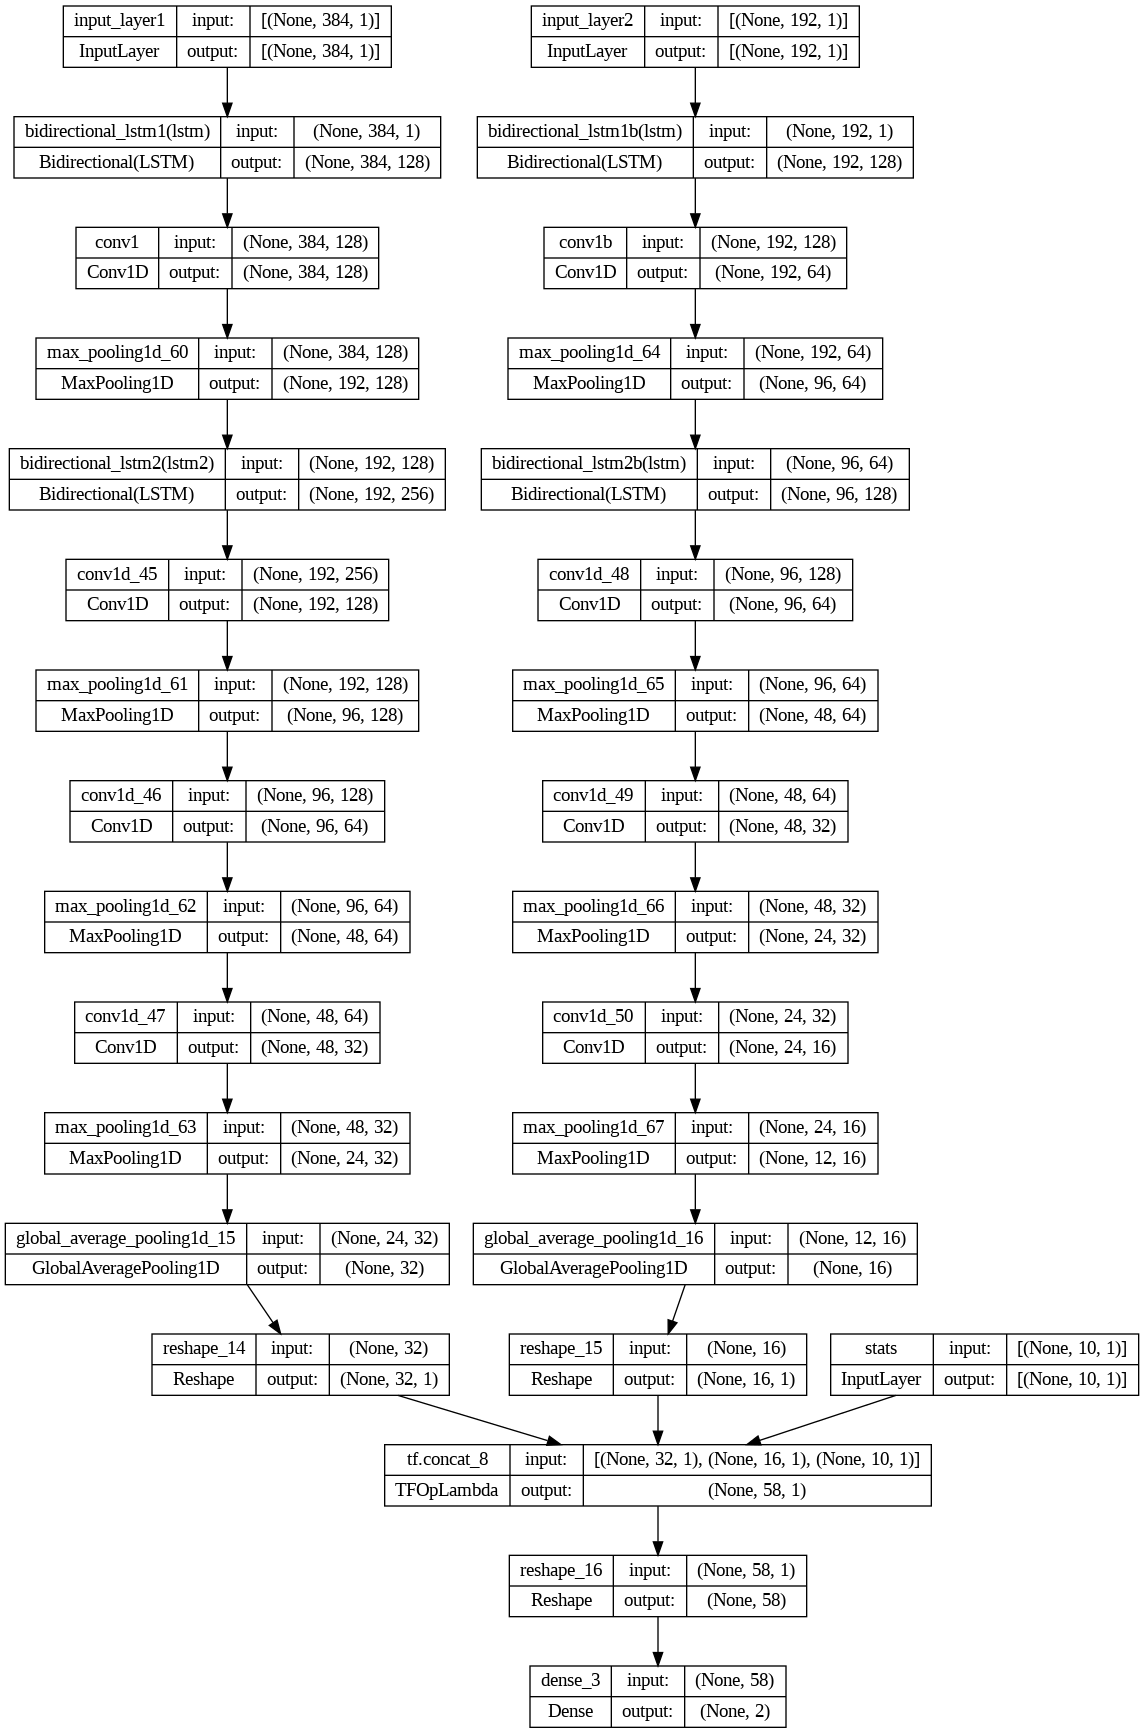

In [ ]:
model = build_model(input_shape,input_shape2,stats, LR)
model.summary()
tfk.utils.plot_model(model, expand_nested=True, show_shapes=True)

In [ ]:
history = model.fit(
    x =[X_train_final,fft_final,stats_train],
    y = (y_train_final),
    batch_size = batch_size,
    epochs = epochs,
    class_weight=CLASS_WEIGHT,
    validation_data=([X_val,val_fft,val_stats],y_val),
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_loss', mode='min', restore_best_weights=True,patience=patience_ES),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=patience_LR, factor=factor_LR, min_lr=1e-5)
    ]
).history

Epoch 1/50
36/36 [==============================] - 33s 278ms/step - loss: 0.7202 - accuracy: 0.5626 - recall: 0.5626 - precision: 0.5626 - val_loss: 0.6939 - val_accuracy: 0.5706 - val_recall: 0.5706 - val_precision: 0.5706 - lr: 1.0000e-04
Epoch 2/50
36/36 [==============================] - 6s 162ms/step - loss: 0.6835 - accuracy: 0.6106 - recall: 0.6106 - precision: 0.6106 - val_loss: 0.6935 - val_accuracy: 0.5625 - val_recall: 0.5625 - val_precision: 0.5625 - lr: 1.0000e-04
Epoch 3/50
36/36 [==============================] - 6s 157ms/step - loss: 0.6696 - accuracy: 0.6161 - recall: 0.6161 - precision: 0.6161 - val_loss: 0.7215 - val_accuracy: 0.5464 - val_recall: 0.5464 - val_precision: 0.5464 - lr: 1.0000e-04
Epoch 4/50
36/36 [==============================] - 6s 164ms/step - loss: 0.6537 - accuracy: 0.6158 - recall: 0.6158 - precision: 0.6158 - val_loss: 0.7186 - val_accuracy: 0.5283 - val_recall: 0.5283 - val_precision: 0.5283 - lr: 1.0000e-04
Epoch 5/50
36/36 [=================

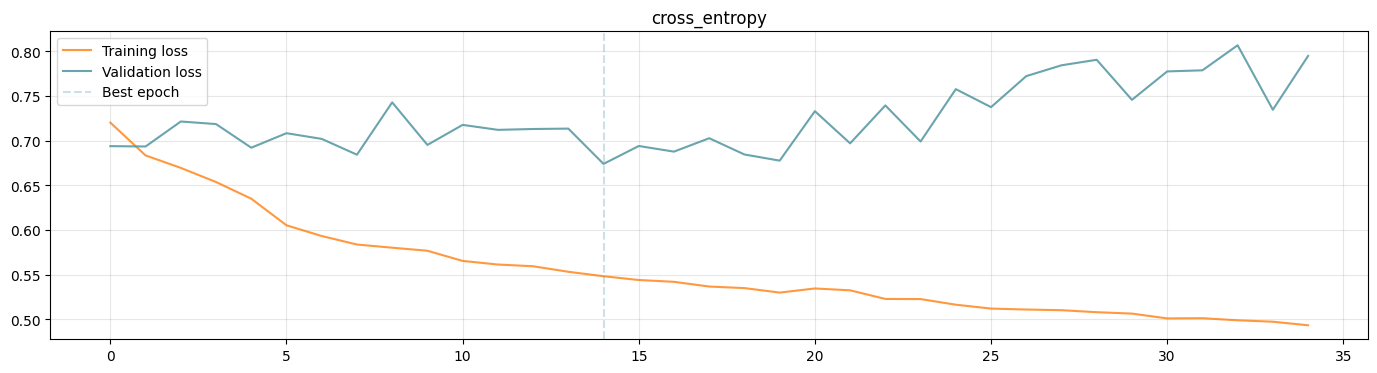

In [ ]:
best_epoch = np.argmin(history['val_loss'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('cross_entropy')
plt.legend()
plt.grid(alpha=.3)
plt.show()



#predict

In [ ]:
y=model.predict([X_val,val_fft,val_stats])

66/66 [==============================] - 2s 26ms/step


In [ ]:
y

array([[0.6054351 , 0.39456493],
       [0.6351367 , 0.36486322],
       [0.12080041, 0.8791996 ],
       ...,
       [0.46709788, 0.5329021 ],
       [0.7633584 , 0.2366416 ],
       [0.76528907, 0.23471095]], dtype=float32)

In [ ]:
media_diff=[]
for i in range(y.shape[0]):
  media_diff.append(np.abs(y[i][0]-y[i][1]))
media_diff=np.array(media_diff)
np.mean(media_diff)

0.42715335

In [ ]:
y_val=np.argmax(y_val,axis=-1)

In [ ]:
y=np.argmax(y,axis=-1)

              precision    recall  f1-score   support

           0       0.67      0.73      0.70      1212
           1       0.58      0.50      0.54       891

    accuracy                           0.63      2103
   macro avg       0.62      0.62      0.62      2103
weighted avg       0.63      0.63      0.63      2103



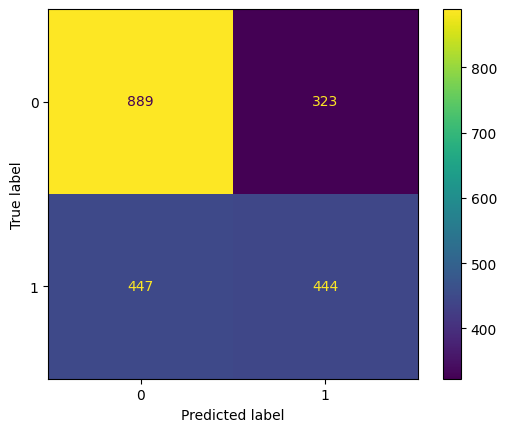

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
ConfusionMatrixDisplay.from_predictions(y_val, y)

print(classification_report(y_val,y))

#save

In [ ]:
from tensorflow.keras.models import save_model
model.save('/content/drive/MyDrive/APPLED_AI_ASSIGMENT/MODELLI/BID_FREQ_STATS')